# Machine learning - Classification and Regression

In [1]:
# importing libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the data ( breast cancer in coimbra dataset)
coimbra=pd.read_csv("breast_cancer_.csv")

In [3]:
coimbra.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [7]:
coimbra.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474282,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


In [29]:
# REMOVING THE OULIERS FROM THE DATASET
from scipy.stats import zscore
z=np.abs(zscore(coimbra))
z

array([[0.57979363, 0.81667527, 1.62210146, ..., 0.53826597, 0.06092916,
        1.10940039],
       [1.60182096, 1.37875056, 0.21020527, ..., 1.4463263 , 0.11136481,
        1.10940039],
       [1.53948912, 0.89176446, 0.26675504, ..., 0.32782802, 0.35969372,
        1.10940039],
       ...,
       [0.47984774, 0.89385486, 0.06372131, ..., 0.17369539, 0.47941351,
        0.90138782],
       [0.91617066, 0.39854568, 0.80525553, ..., 1.7158582 , 0.15079213,
        0.90138782],
       [1.7888165 , 0.0804471 , 1.89192052, ..., 1.35951802, 2.31421383,
        0.90138782]])

In [30]:
# AS THRESHOLD IS 3 THEREFORE :-
cancer=coimbra[(z<3).all(axis=1)]

In [34]:
x=cancer.iloc[:,0:-1] # FEATURES
y=cancer.iloc[:,-1] # TARGET VARIABLE

In [35]:
from sklearn.preprocessing import StandardScaler  # SCALING THE DATASET BETWEEN [0,1]
ss=StandardScaler()   
x=ss.fit_transform(x)

In [36]:
x

array([[-0.55320976, -0.80031543, -1.89959049, ...,  0.1721764 ,
        -0.51072909, -0.04605406],
       [ 1.6686983 , -1.35400978, -0.12846043, ..., -0.76979912,
        -1.45567813,  0.14083683],
       [ 1.60521521, -0.87428499, -0.19939836, ...,  1.62068394,
        -0.29174238,  0.41020444],
       ...,
       [ 0.52600272,  0.88470952,  0.21516229, ...,  1.62918084,
        -0.13134833, -0.49999287],
       [ 0.97038434, -0.38842044, -0.87491148, ...,  2.34910984,
        -1.7361594 , -0.14353032],
       [ 1.85914756, -0.07506492,  2.50851688, ...,  0.80968384,
        -1.36534339, -2.49023944]])

In [37]:
from sklearn.model_selection import GridSearchCV # FOR FINDING THE BEST PARAMETERS
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,cross_val_predict  # FOR FINDING VALIDATION OF DATASET
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score #METRICES 

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)

In [44]:
from sklearn.linear_model import LogisticRegression #LOGISTIC REGRESSION MODEL
lr=LogisticRegression()
lr=lr.fit(x_train,y_train)
y_lr=lr.predict(x_test)
print('accuracy_scr:',accuracy_score(y_test,y_lr))
print('confusion_mat:',confusion_matrix(y_test,y_lr))
print('classification_repo:',classification_report(y_test,y_lr))
print('F1:',f1_score(y_test,y_lr))

accuracy_scr: 0.8
confusion_mat: [[12  1]
 [ 4  8]]
classification_repo:               precision    recall  f1-score   support

           1       0.75      0.92      0.83        13
           2       0.89      0.67      0.76        12

    accuracy                           0.80        25
   macro avg       0.82      0.79      0.79        25
weighted avg       0.82      0.80      0.80        25

F1: 0.8275862068965517


In [45]:
#finding the parameteres or tuning the parameters for the LOGISTIC REGR. and now finding the same results

In [46]:
para_lr={'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
clf_lr=GridSearchCV(lr,para_lr)
clf_lr.fit(x,y)
clf_lr.best_params_


C:\Users\prince\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 0.09, 'penalty': 'l1'}

In [47]:
lr=LogisticRegression(penalty='l1',C=0.09)
print('accuracy_scr:',accuracy_score(y_test,y_lr))
print('confusion_mat:',confusion_matrix(y_test,y_lr))
print('classification_repo:',classification_report(y_test,y_lr))
print('F1:',f1_score(y_test,y_lr))

accuracy_scr: 0.8
confusion_mat: [[12  1]
 [ 4  8]]
classification_repo:               precision    recall  f1-score   support

           1       0.75      0.92      0.83        13
           2       0.89      0.67      0.76        12

    accuracy                           0.80        25
   macro avg       0.82      0.79      0.79        25
weighted avg       0.82      0.80      0.80        25

F1: 0.8275862068965517


In [48]:
# no much improvent in the model after using the fridsearch or tuning the parameteres 

In [49]:
# CROSS VALIDATING THE RESULTS 
score_mean=cross_val_score(lr,x,y,cv=5).mean() 
score_std=cross_val_score(lr,x,y,cv=5).std()
print(score_mean)
print(score_std)

0.6878787878787879
0.053867844953427814


In [50]:
# now import various other models ,ensemle,boosting methods and interpretting results with/without parameters tuning and crossvaldating 
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score,roc_curve,auc

In [51]:
rfc=RandomForestClassifier()
knn=KNeighborsClassifier()
svc=SVC()
ada=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
dtc=DecisionTreeClassifier()
GB=GaussianNB()

In [52]:
models = []
models.append(('randomforestclassifier', rfc))
models.append(('kneighborsclassifier', knn))
models.append(('svc', svc))
models.append(('ada boost classifier', ada))
models.append(('gradient boosting classifier', gbc))
models.append(('decisiontreeclassifier', dtc))
models.append(('GAUSSIANNB', GB))


******** randomforestclassifier *******


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


acc_score= 0.68


f1_scr= 0.6923076923076923


cross_val_sc= 0.6538461538461539


cross_val_std= 0.08446498799663245


roc_auc_sc= 0.6794871794871794


classification_repo
               precision    recall  f1-score   support

           1       0.69      0.69      0.69        13
           2       0.67      0.67      0.67        12

    accuracy                           0.68        25
   macro avg       0.68      0.68      0.68        25
weighted avg       0.

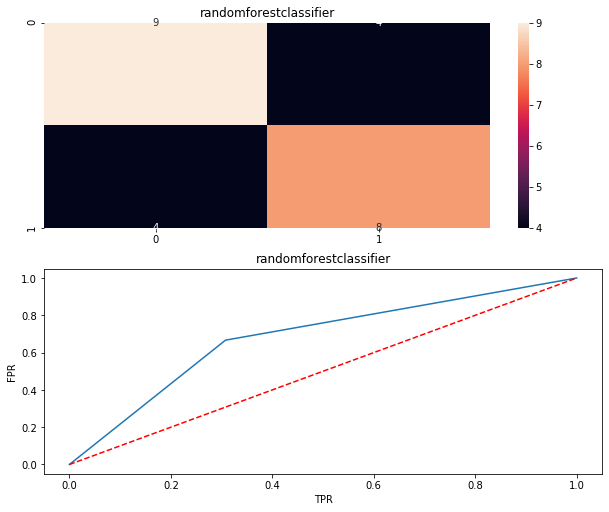

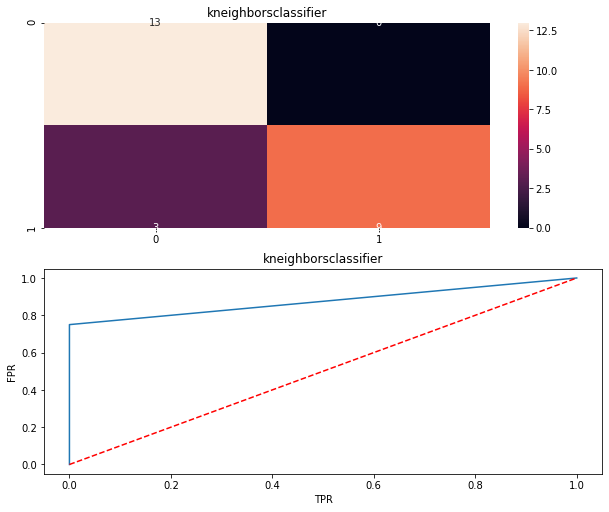

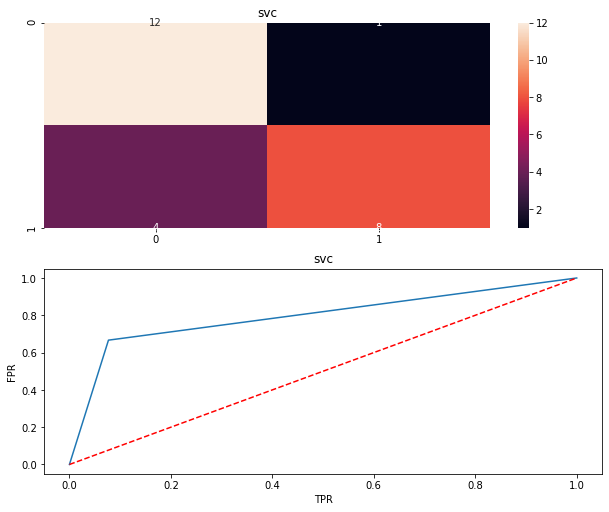

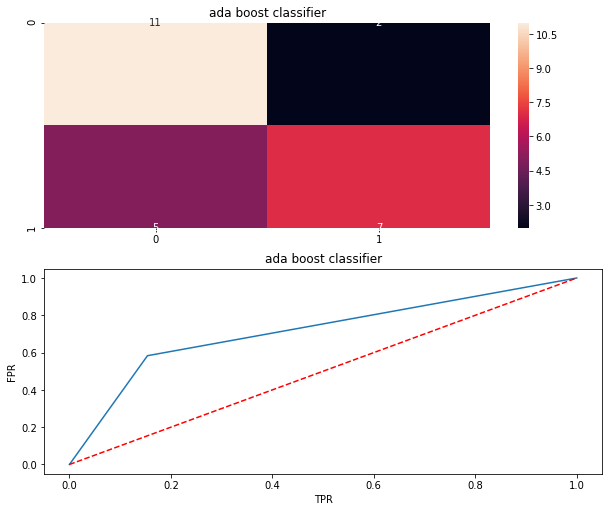

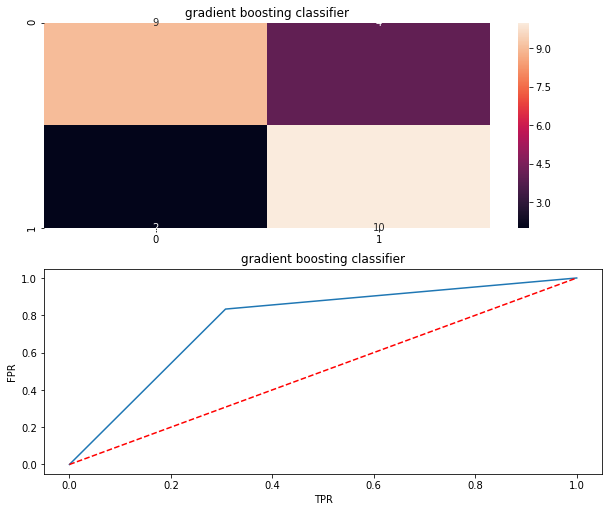

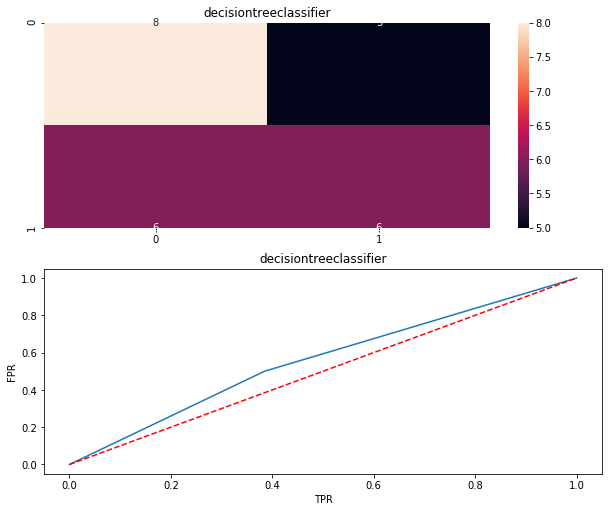

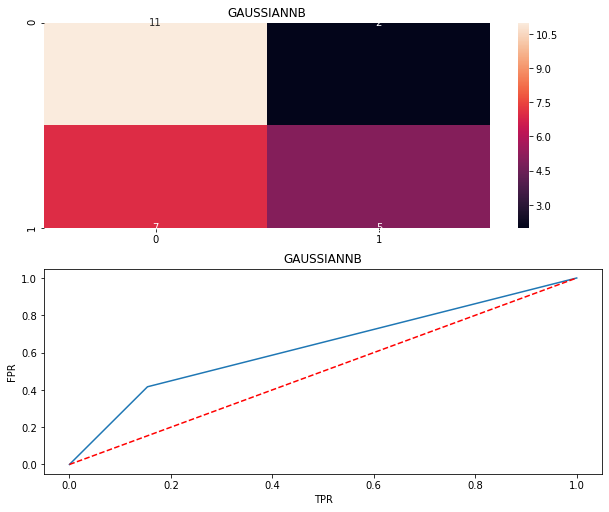

In [53]:
Model=[]
score=[]
cvs=[]
std=[]
rocscore=[]
F1=[]
for name,model in models:
    print('********',name,'*******')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print("acc_score=",AS)
    score.append(AS*100)
    print('\n')
    F=f1_score(y_test,pre)
    print("f1_scr=",F)
    F1.append(F*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('cross_val_sc=',sc)
    cvs.append(sc*100)
    print('\n')
    st=cross_val_score(model,x,y,cv=10,scoring='accuracy').std()
    print('cross_val_std=',st)
    std.append(st*100)
    print('\n')
    fpr,tpr,thresholds=roc_curve(y_test,pre,pos_label=2)
    roc_auc=auc(fpr,tpr)
    print("roc_auc_sc=",roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_repo\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],'r--')
    plt.xlabel('TPR')
    plt.ylabel('FPR')
    print('\n\n')

In [54]:
result=pd.DataFrame({'model':Model,'Accu_score':score,'F1 SCORE':F1,'cross_val_Score':cvs,'std_cross_Val':std,'roc_Scr':rocscore})
result # results without parameter tuning and cross validating the results 

,model,Accu_score,F1 SCORE,cross_val_Score,std_cross_Val,roc_Scr
0,randomforestclassifier,68.0,69.230769,65.384615,8.446499,67.948718
1,kneighborsclassifier,88.0,89.655172,67.972028,7.484805,87.500000
2,svc,80.0,82.758621,67.832168,14.156306,79.487179
3,ada boost classifier,72.0,75.862069,66.573427,18.768897,71.474359
4,gradient boosting classifier,76.0,75.000000,76.783217,9.194940,76.282051
5,decisiontreeclassifier,56.0,59.259259,68.111888,13.676470,55.769231
6,GAUSSIANNB,64.0,70.967742,66.013986,10.638568,63.141026


In [55]:
#kneighbors classifier is working best with the F1 score of greater than 89 and cross val 68

In [56]:
# NOW  **************  TUNING THE PARAMETERS   ************ FOR THE MODELS ,TECHNIQUES AND AGAIN CROSS VALIDAITNG THE RESULTS 

In [57]:
#USING GRIDSEARCH CV FOR FINDING THE BEST PARAMETERS FOR TUNING THE MODELS :_##########

In [58]:
knn=KNeighborsClassifier()
parameters={'n_neighbors':[1,2,3,4,5,6,7,8,9,10],
          'leaf_size':[1,2,3,5,6,7,8,9,10],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute']}
clf=GridSearchCV(knn,parameters)
clf.fit(x,y)
clf.get_params


C:\Users\prince\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


<bound method BaseEstimator.get_params of GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [1, 2, 3, 5, 6, 7, 8, 9, 10],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)>

In [59]:
clf.best_params_

{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 8, 'weights': 'uniform'}

In [60]:
svc=SVC()
params = {'C': [1,2,3,4,5,6,7,8,9,10,11,12], 
          'kernel': ['linear','rbf']}
clf=GridSearchCV(svc,params)
clf.fit(x,y)
print(clf.get_params)
print(clf.best_params_)

<bound method BaseEstimator.get_params of GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)>
{'C': 1, 'kernel': 'rbf'}


C:\Users\prince\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [61]:
dtc=DecisionTreeClassifier()
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
         'criterion':['gini','entropy']}
clfd=GridSearchCV(dtc,params)
clfd.fit(x,y)
print(clfd.get_params)
print(clfd.best_params_)

<bound method BaseEstimator.get_params of GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_

C:\Users\prince\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [62]:
gbc=GradientBoostingClassifier()
parameters={'n_estimators':[10,15,20,25,30,100,200,300,400,500,1000],
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
          'min_samples_split':[3,4,5,6,7,8,9,10], 
          'random_state':[42],
          'n_jobs':[-1],
            'bootstrap':[True,False]}
clf=GridSearchCV(gbc,parameters)
clf.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_it...
                          

In [105]:
ada=AdaBoostClassifier()
parameters={'n_estimators':[10,15,20,25,30,100,200,300,400,500,1000],'learning_rate':[0.001,0.01,0.1,1],
            'bootstrap':[True,False]}
clf=GridSearchCV(ada,parameters)
clf.get_params
ada=AdaBoostClassifier(n_estimators=100)

In [64]:
rfc=RandomForestClassifier()
parameters={'n_estimators':[10,15,20,25,30,100,200,300,400,500,1000],'learning_rate':[0.001,0.01,0.1,1],
            'bootstrap':[True,False]}
clf=GridSearchCV(rfc,parameters)
clf.get_params



<bound method BaseEstimator.get_params of GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                  

In [65]:
### after Finding out the best parameters for the above models, let us now tune them accourdingly and interpretting ther results 

# knn
knn=KNeighborsClassifier(algorithm ='auto',
 leaf_size= 1,
 n_neighbors= 8,
 weights='uniform')
## dtc
dtc=DecisionTreeClassifier(criterion='entropy', max_features= 'auto', min_samples_leaf=2, min_samples_split= 8)
## random forest (ensemble)
rfc=RandomForestClassifier(bootstrap=True,n_estimators=50)
## gradient boosting technique
gbc=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100)
# ada boosting technique
ada=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None)
# support vector machine (classifier)
svc=SVC(kernel='rbf',C=1)

In [107]:
models = []
models.append(('randomforestclassifier', rfc))
models.append(('kneighborsclassifier', knn))
models.append(('svc', svc))
models.append(('ada boost classifier', ada))
models.append(('gradient boosting classifier', gbc))
models.append(('decisiontreeclassifier', dtc))
models.append(('GAUSSIANNB', GB))


In [108]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=58)

******** randomforestclassifier *******


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


acc_score= 0.7941176470588235


f1_scr= 0.7199999999999999


cross_val_sc= 0.6797202797202797


cross_val_std= 0.09600815408668209


roc_auc_sc= 0.7747252747252747


classification_repo
               precision    recall  f1-score   support

           1       0.75      0.69      0.72        13
           2       0.82      0.86      0.84        21

    accuracy                           0.79        34
   macro avg       0.78      0.77      0.78        34
weighte

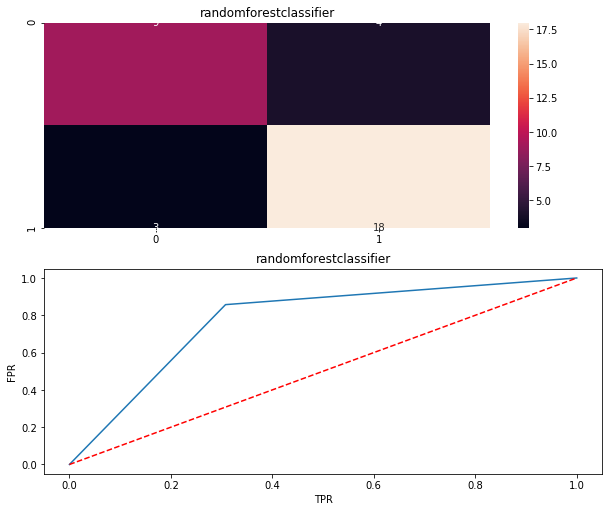

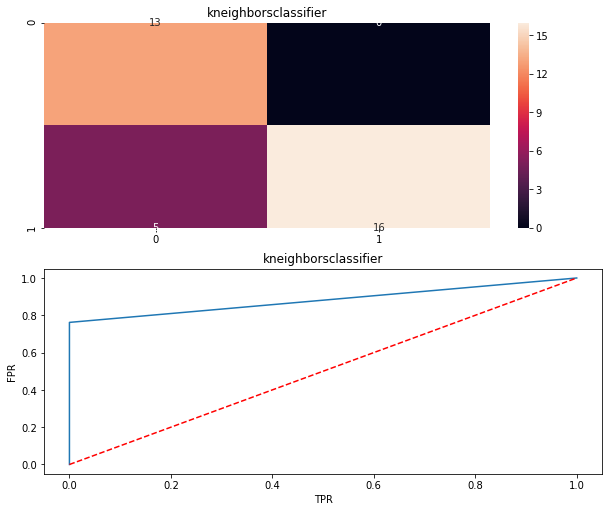

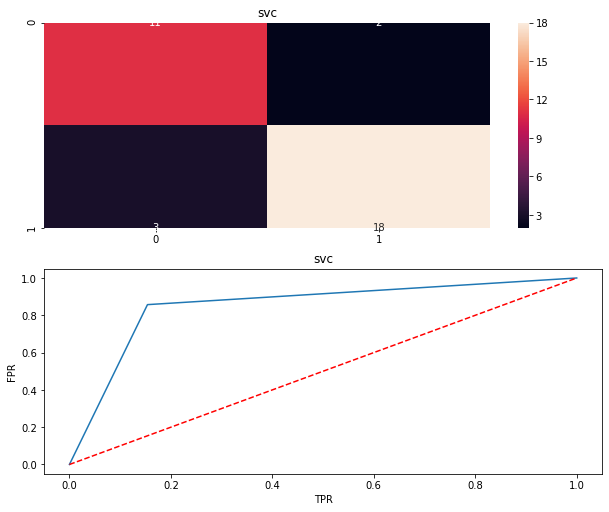

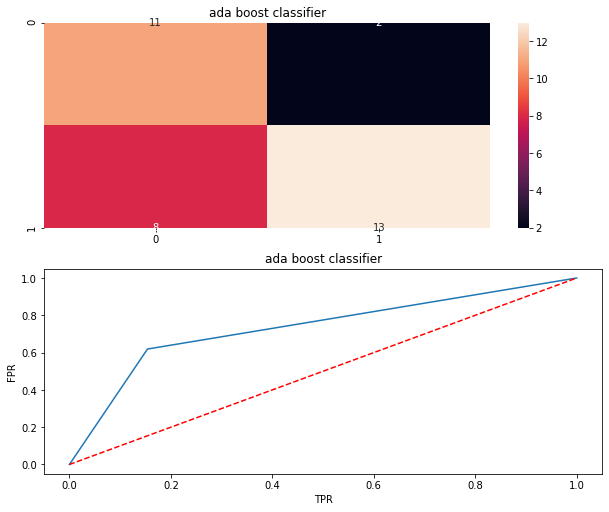

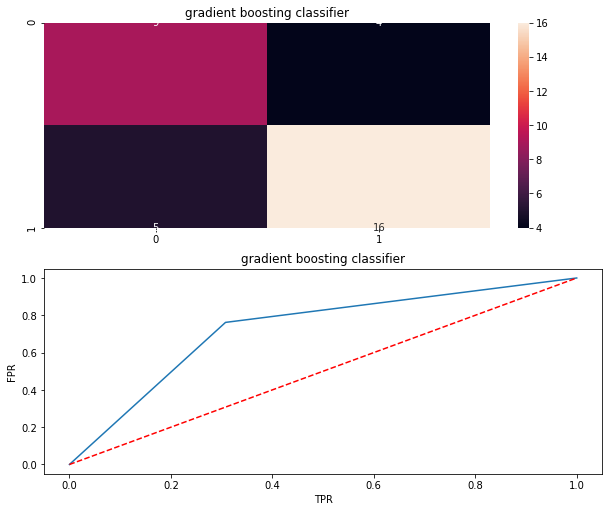

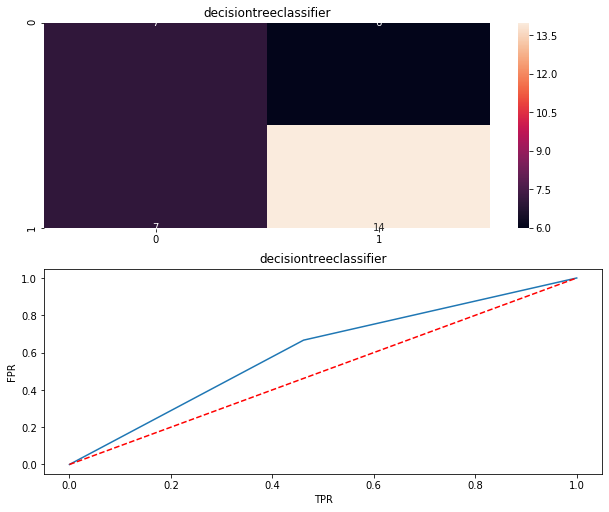

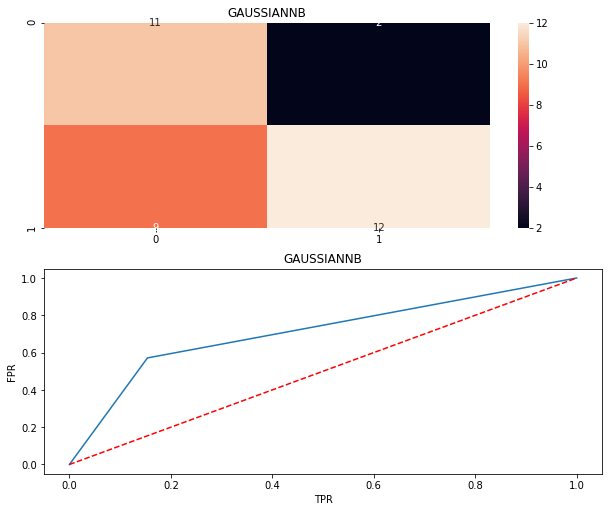

In [109]:
Model=[]
score=[]
cvs=[]
std=[]
rocscore=[]
F1=[]
for name,model in models:
    print('********',name,'*******')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print("acc_score=",AS)
    score.append(AS*100)
    print('\n')
    F=f1_score(y_test,pre)
    print("f1_scr=",F)
    F1.append(F*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('cross_val_sc=',sc)
    cvs.append(sc*100)
    print('\n')
    st=cross_val_score(model,x,y,cv=10,scoring='accuracy').std()
    print('cross_val_std=',st)
    std.append(st*100)
    print('\n')
    fpr,tpr,thresholds=roc_curve(y_test,pre,pos_label=2)
    roc_auc=auc(fpr,tpr)
    print("roc_auc_sc=",roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_repo\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],'r--')
    plt.xlabel('TPR')
    plt.ylabel('FPR')
    print('\n\n')

In [110]:
result=pd.DataFrame({'model':Model,'Accu_score':score,'F1 SCORE':F1,'cross_val_Score':cvs,'std_cross_Val':std,'roc_Scr':rocscore})
result

,model,Accu_score,F1 SCORE,cross_val_Score,std_cross_Val,roc_Scr
0,randomforestclassifier,79.411765,72.000000,67.972028,9.600815,77.472527
1,kneighborsclassifier,85.294118,83.870968,70.279720,15.477311,88.095238
2,svc,85.294118,81.481481,67.832168,14.156306,85.164835
3,ada boost classifier,70.588235,68.750000,66.433566,15.144341,73.260073
4,gradient boosting classifier,73.529412,66.666667,76.783217,9.974293,72.710623
5,decisiontreeclassifier,61.764706,51.851852,62.027972,8.446499,60.256410
6,GAUSSIANNB,67.647059,66.666667,66.013986,10.638568,70.879121


In [111]:
# conclusion  =   after tuning the parameters the cross valdation score is now coming more high since before
##############   the cross val is much more closer now , tuning the  parameters increse the model validataion

# tuning the parameters increases the model validation ,removes underfitting/overfitting of the model 
#tuning parameters is good for model validtion in real life and workings ....

# knn is working best with a  acc score of greater than 85
#saving the knn model

In [112]:
from sklearn.externals import joblib
joblib.dump(knn,'grids.pkl')

['grids.pkl']